In [4]:
import pandas as pd

In [5]:
players = pd.read_csv('./dati_torneo/t_players.csv')

In [6]:
players[players.winner > 0].sort_values(by=["winner", "gold_shoe"], ascending=False)

,id_player,surname,name,position,winner,gold_shoe
3,4,Troiani,Vincenzo,C,2,0
14,15,Clemente,Nicola,C,2,0
22,23,Di Spirito,Daniele,D,2,0
4,5,Borracci,Silvio,A,1,3
35,36,Palazzo,Carlo,A,1,1
0,1,Porrelli,Giuseppe,C,1,0
1,2,Ciavarella,Giuseppe,D,1,0
2,3,Marroccoli,Giuseppe,P,1,0
5,6,Positano,Alessandro,A,1,0
6,7,Colucci,Gianvito,D,1,0


In [7]:
details = pd.read_csv('./dati_torneo/t_details.csv')
details

,id,id_match,id_player,id_team,gol,assist,autogol
0,1,3,5,1,1,0,0
1,2,3,1,1,5,0,0
2,3,3,8,1,2,0,1
3,4,3,2,1,0,0,1
4,5,3,29,3,6,0,0
...,...,...,...,...,...,...,...
572,574,61,27,14,1,1,0
573,575,61,29,14,2,0,0
574,576,61,25,14,1,0,0
575,577,61,4,14,0,0,0


In [8]:
pt = details.pivot_table(values="id", columns="gol", aggfunc="count")
sum_value: int = pt.sum(True)
perc_of_goals = pd.DataFrame({i: el/sum_value * 100 for i, el in enumerate(pt.values[0])})
perc_of_goals


,0,1,2,3,4,5,6,7,8,9
id,39.168111,24.783362,14.038128,8.665511,5.719237,3.986135,2.079723,1.039861,0.34662,0.17331


In [9]:
matches = pd.read_csv('./dati_torneo/t_matches.csv')

print([len(matches[matches.state == '1']),
 len(matches[matches.gol_home == matches.gol_away][matches.state != '0']),
 len(matches[matches.state == '2'])])

matches[matches.state == '1X']
# matches[matches.state == 'X2']


[22, 5, 32]


C:\Users\danie\AppData\Local\Temp\ipykernel_14248\3956714460.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(matches[matches.gol_home == matches.gol_away][matches.state != '0']),


,id_match,id_team_home,id_team_away,state,gol_home,gol_away,pen_gol_home,pen_gol_away,type,date
10,13,3,4,1X,5,5,4.0,1.0,-3,NaN
26,29,6,5,1X,4,4,4.0,2.0,0,2023-12-04


<AxesSubplot:xlabel='tot_gol'>

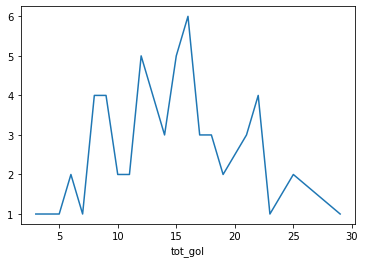

In [10]:
matches["tot_gol"] = matches["gol_home"] + matches["gol_away"]
matches[matches.state != '0'].groupby("tot_gol").size().plot()


In [11]:
matches.groupby("state").size()


state
0     12
1     22
1X     2
2     32
X      3
dtype: int64

<AxesSubplot:title={'center':'Goals scored by team'}, xlabel='id_team_home'>

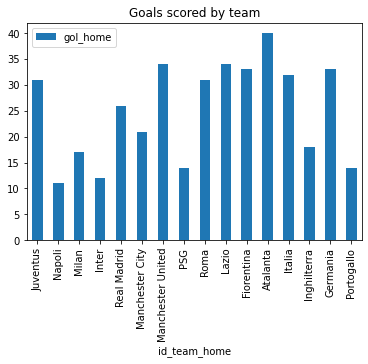

In [17]:
teams = pd.read_csv("./dati_torneo/t_teams.csv")
idx = {id: name for id, name in teams[["id_team", "name"]].values}



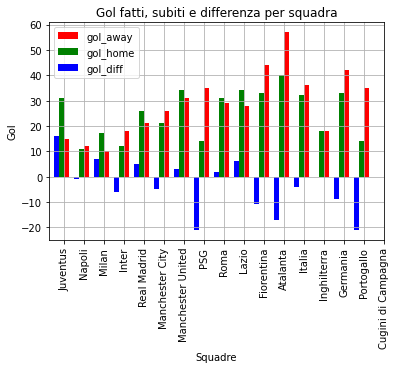

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Caricamento dei dati
teams = pd.read_csv("./dati_torneo/t_teams.csv")
matches = pd.read_csv("./dati_torneo/t_matches.csv")

# Creazione dell'indice per i nomi delle squadre
idx = {id: name for id, name in teams[["id_team", "name"]].values}

# Creazione della pivot table per i gol fatti
pivot_table_scored = matches.pivot_table(index="id_team_home", values="gol_home", aggfunc="sum").rename(columns=idx)
pivot_table_scored.index = pivot_table_scored.index.to_series().replace(idx)
pivot_table_scored = pivot_table_scored.head(-3)

# Creazione della pivot table per i gol subiti
pivot_table_conceded = matches.pivot_table(index="id_team_home", values="gol_away", aggfunc="sum").rename(columns=idx)
pivot_table_conceded.index = pivot_table_conceded.index.to_series().replace(idx)
pivot_table_conceded = pivot_table_conceded.head(-3)

# Calcolo della differenza di gol
pivot_table_diff = pivot_table_scored.copy()
pivot_table_diff["gol_diff"] = pivot_table_scored.gol_home - pivot_table_conceded.gol_away
pivot_table_diff = pivot_table_diff[["gol_diff"]]

# Creazione del grafico
fig, ax = plt.subplots()
pivot_table_conceded.plot(kind="bar", ax=ax, color='red', position=0, width=0.25, label='Gol subiti')
pivot_table_scored.plot(kind="bar", ax=ax, color='green', position=1, width=0.25, label='Gol fatti')
pivot_table_diff.plot(kind="bar", ax=ax, color='blue', position=2, width=0.25, label='Differenza gol')

plt.title("Gol fatti, subiti e differenza per squadra")
plt.xlabel("Squadre")
plt.ylabel("Gol")
plt.legend()
plt.grid(True)
plt.show()